# Sample Superstore | Profitability: Pricing & Cost Optimization


## **Executive Summary**
This analysis, based on the fictional *Sample Superstore* dataset, identifies the **root causes of the company’s profitability challenges** and highlights the **drivers of major financial losses** within the business. Through targeted EDA, we uncovered how **discounting practices** and **product-level performance** are undermining margins, especially within the **Furniture category**.

### METHODOLOGY

The notebook follows a structured approach:

- **Inspection** and **Cleaning** of the dataset
- **Exploratory Data Analysis (EDA)** focused on Profitability
- **Strategic Insights** and **Recommendations**

### INSIGHTS

Key findings include:

- A **strong negative correlation** exists between **Discount and Profit** ($r = -0.22$).
- **Profit erosion** is centered on the **Furniture** category, which is the weakest-performing category, contributing only **6%** of the total company profit.
- Major losses are driven by the sub-categories **Tables** (Net Loss: ~$17.7K) and **Bookcases** (Net Loss: ~$3.5K), which are the top loss-making sub-categories.
- **Structural Cost Issue**: Quantitative analysis confirms a structural cost issue, as these loss-drivers show **a negative Break-Even Discount** (meaning they lose money even at a 0% discount).

### RECOMMENDATIONS

Based on the findings, the negative Break-Even Discount mandates immediate structural intervention.

1. **Immediate Corrective Action:** All promotional activity on unprofitable SKUs must be suspended forthwith.


2. **Long-term structural focus:**

    A. Cost structure correction: Review operational expenditures to establish positive margins.
    
    B. Base price optimization: Implement a definitive base price increase to ensure full cost coverage.

    C. Strategic pricing alignment: Future strategies must be strictly margin-based, differentiating between low-frequency (Furniture) and high-frequency (Supplies) items.


## **Sections**
**1. Inspection & Quality Check** 

**2. Cleaning** 

**3. EDA & Quantitative Analysis**
- `Profit` Distribution: Initial visualization of profit across segments.
-  Relationship between `Sales`, `Profit` and `Discount`: Scatter plots and correlation analysis to identify the negative relationship.
-  `Profit` by `Category` AnalysisBreakdown of profit/loss by major categories.
-  `Profit` by `Subcategory` Analysis: Pinpointing Tables, Bookcases, and Supplies as primary loss drivers.
- Quantitative Break-Even Calculation:
    - Calculation of Total Cost per Subcategory: $\text{Total Cost} = \text{Total Sales} - \text{Total Profit}$.
    - Calculation of Break-Even Discount ($\text{Sconto}_{\text{BE}}$): Determining the maximum sustainable discount where $\text{Profit} = 0$, based on the cost ratio.

**4. Conclusions & Strategic Recommendations**
-  Key Metrics
-  Strategic Insights
-  Recommendations

---

### **1. Inspection & Quality Check**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('/Users/saramagni/Documents/Data Analytics Projects/My Projects/sample_superstore_profitability/sample_superstore.csv')

In [4]:
data

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9988,Standard Class,Corporate,United States,Athens,Georgia,30605,South,Technology,Phones,206.1000,5,0.00,55.6470
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932


In [5]:
data.head(20)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
5,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Furniture,Furnishings,48.8600,7,0.00,14.1694
6,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Art,7.2800,4,0.00,1.9656
7,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Technology,Phones,907.1520,6,0.20,90.7152
8,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Binders,18.5040,3,0.20,5.7825
9,Standard Class,Consumer,United States,Los Angeles,California,90032,West,Office Supplies,Appliances,114.9000,5,0.00,34.4700


In [6]:
data.tail(20)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9973,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Technology,Phones,271.960,5,0.2,27.1960
9974,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Office Supplies,Art,18.690,7,0.0,5.2332
9975,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Office Supplies,Paper,13.360,2,0.0,6.4128
9976,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Technology,Phones,249.584,2,0.2,31.1980
9977,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Office Supplies,Fasteners,13.860,7,0.0,0.0000
9978,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Office Supplies,Binders,13.376,4,0.2,4.6816
9979,Standard Class,Home Office,United States,Los Angeles,California,90032,West,Office Supplies,Binders,437.472,14,0.2,153.1152
9980,Second Class,Consumer,United States,Lafayette,Louisiana,70506,South,Furniture,Tables,85.980,1,0.0,22.3548
9981,First Class,Consumer,United States,Fairfield,Ohio,45014,East,Office Supplies,Labels,16.520,5,0.2,5.3690
9982,Standard Class,Consumer,United States,Grand Rapids,Michigan,49505,Central,Office Supplies,Paper,35.560,7,0.0,16.7132


In [7]:
#Visualize a sample of the data.
data.sample(20)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
8166,Standard Class,Consumer,United States,San Diego,California,92105,West,Furniture,Bookcases,512.499,3,0.15,-30.1470
9422,Standard Class,Corporate,United States,San Francisco,California,94122,West,Office Supplies,Supplies,40.700,5,0.00,11.8030
4150,Standard Class,Consumer,United States,Austin,Texas,78745,Central,Office Supplies,Storage,259.136,4,0.20,-58.3056
4111,Standard Class,Corporate,United States,Detroit,Michigan,48227,Central,Office Supplies,Paper,17.340,3,0.00,8.4966
573,Standard Class,Consumer,United States,New York City,New York,10024,East,Technology,Phones,14.850,3,0.00,4.0095
9503,Standard Class,Consumer,United States,Rome,New York,13440,East,Office Supplies,Art,2.880,1,0.00,0.8064
9585,First Class,Corporate,United States,Miami,Florida,33142,South,Office Supplies,Paper,31.008,1,0.20,11.2404
6801,Standard Class,Corporate,United States,Phoenix,Arizona,85023,West,Technology,Accessories,45.120,3,0.20,-7.8960
1723,Standard Class,Consumer,United States,Chicago,Illinois,60623,Central,Furniture,Bookcases,359.058,3,0.30,-71.8116
8713,Standard Class,Corporate,United States,San Diego,California,92105,West,Technology,Phones,71.952,6,0.20,5.3964


In [8]:
#Check Dtype and the presence of missing values (Non-Null Count).
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9993 non-null   object 
 1   Segment       9993 non-null   object 
 2   Country       9993 non-null   object 
 3   City          9993 non-null   object 
 4   State         9993 non-null   object 
 5   Postal Code   9993 non-null   int64  
 6   Region        9993 non-null   object 
 7   Category      9993 non-null   object 
 8   Sub-Category  9993 non-null   object 
 9   Sales         9993 non-null   float64
 10  Quantity      9993 non-null   int64  
 11  Discount      9993 non-null   float64
 12  Profit        9993 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.0+ KB


In [9]:
#Explore the distribution and frequency of values for categorical variables.
data.value_counts()

Ship Mode       Segment      Country        City           State       Postal Code  Region  Category         Sub-Category  Sales    Quantity  Discount  Profit   
Second Class    Consumer     United States  Seattle        Washington  98115        West    Office Supplies  Paper         12.960   2         0.0        6.2208      2
Standard Class  Home Office  United States  Seattle        Washington  98105        West    Furniture        Furnishings   22.140   3         0.0        6.4206      2
                Consumer     United States  San Francisco  California  94122        West    Office Supplies  Paper         12.840   3         0.0        5.7780      2
                                            Los Angeles    California  90036        West    Office Supplies  Paper         19.440   3         0.0        9.3312      2
Same Day        Home Office  United States  San Francisco  California  94122        West    Office Supplies  Labels        41.400   4         0.0        19.8720     2
   

In [10]:
#Count the number of duplicate rows.
data.duplicated().sum()

np.int64(17)

In [11]:
# Check if the minimum quantity > 0.
print("Minimum Quantity Value:", data['Quantity'].min())

Minimum Quantity Value: 1


In [12]:
# Check how many Quantity values are <= 0.
print("Count of Quantity <= 0:", data[data['Quantity'] <= 0].shape[0])

Count of Quantity <= 0: 0


In [13]:
#Summary Stats
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ship Mode,9993,4,Standard Class,5968,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,9993,3,Consumer,5190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,9993,1,United States,9993,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,9993,531,New York City,915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,9993,49,California,2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Postal Code,9993.0,NaN,NaN,NaN,55186.627539,32063.103801,1040.0,23223.0,56301.0,90008.0,99301.0
Region,9993,4,West,3202,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,9993,3,Office Supplies,6025,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub-Category,9993,17,Binders,1523,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales,9993.0,NaN,NaN,NaN,229.85667,623.276273,0.444,17.28,54.48,209.94,22638.48


### **2. Cleaning**

In [14]:
# Remove duplicate rows, keeping the first occurrence, and update the DF.
data.drop_duplicates(inplace=True) 

In [15]:
# Check the new shape of the DF (it should now have 9976 rows).
data.shape

(9976, 13)

In [16]:
# Convert Postal Code to string to treat it as categorical data.
data['Postal Code'] = data['Postal Code'].astype(str)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9976 entries, 0 to 9992
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9976 non-null   object 
 1   Segment       9976 non-null   object 
 2   Country       9976 non-null   object 
 3   City          9976 non-null   object 
 4   State         9976 non-null   object 
 5   Postal Code   9976 non-null   object 
 6   Region        9976 non-null   object 
 7   Category      9976 non-null   object 
 8   Sub-Category  9976 non-null   object 
 9   Sales         9976 non-null   float64
 10  Quantity      9976 non-null   int64  
 11  Discount      9976 non-null   float64
 12  Profit        9976 non-null   float64
dtypes: float64(3), int64(1), object(9)
memory usage: 1.1+ MB


In [17]:
#Summary Stats after cleaning.
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ship Mode,9976,4,Standard Class,5955,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Segment,9976,3,Consumer,5182,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,9976,1,United States,9976,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,9976,531,New York City,914,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,9976,49,California,1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Postal Code,9976,631,10035,263,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,9976,4,West,3192,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,9976,3,Office Supplies,6011,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub-Category,9976,17,Binders,1522,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales,9976.0,NaN,NaN,NaN,230.147597,623.752659,0.444,17.295,54.804,209.97,22638.48


In [18]:
# Count the number of unique values for each column on the clean DF.
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5824
Quantity          14
Discount          12
Profit          7286
dtype: int64

### **3. EDA**

#### Correlation Matrix

In [19]:
# Select only columns with numerical data types (int or float)
numeric_data = data.select_dtypes(include=['number'])

In [20]:
# Calculate the correlation matrix on the numeric columns
correlation_matrix = numeric_data.corr()

In [21]:
# Display the correlation matrix
correlation_matrix

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200730,-0.028310,0.479068
Quantity,0.200730,1.000000,0.008618,0.066228
Discount,-0.028310,0.008618,1.000000,-0.219654
Profit,0.479068,0.066228,-0.219654,1.000000


##### Correlation Matrix Analysis
**Profit vs. Discount (r -0.22)**
Moderate Negative Correlation. As Discount increases, Profit tends to decrease (or losses deepen).

**Profit vs. Sales (r +0.48)**
Moderate Positive Correlation. As Sales volume increases, the potential for Profit also increases. This shows potential. However, since the value is below 0.50, the relationship is significantly disrupted—most likely by the Discount variable.

**Profit vs. Quantity (r +0.07)**
Very weak positive correlation. Profit is only marginally influenced by the number of items sold, suggesting that transaction value depends more on product price or margin than on sales volume.

##### 🎯 Conclusion
The matrix provides concrete evidence: the most detrimental factor to profit is the Discount (r approx -0.22). 
While higher sales volumes moderately increase profit, excessive discounts undermine this effect, making discount management the key driver of profitability.


#### `Profit` Distribution

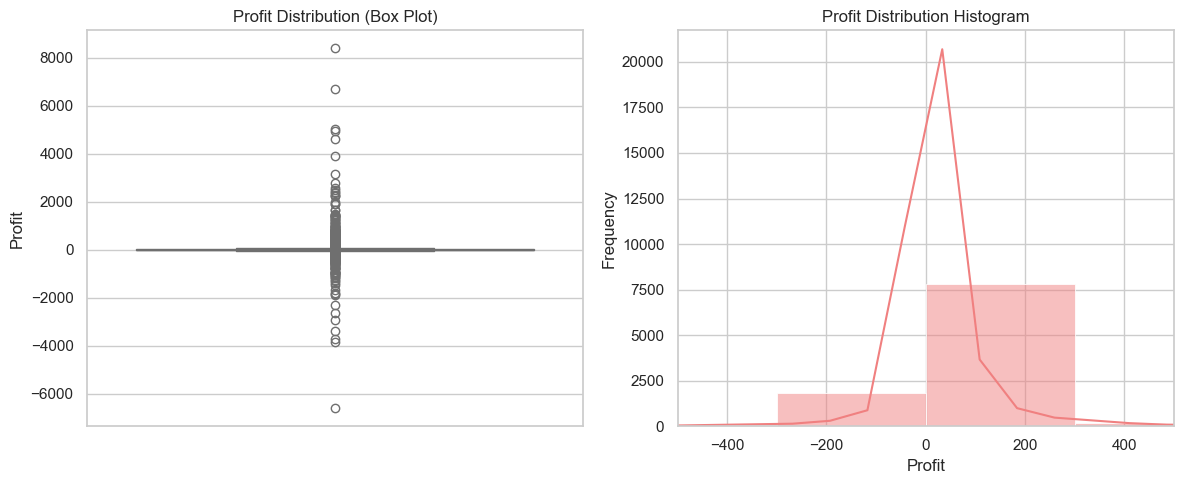

In [22]:
# Set the style for the plots
sns.set_style("whitegrid")
plt.figure(figsize=(12, 5))

# 1. Profit Box Plot (identifies outliers/losses)
plt.subplot(1, 2, 1)
sns.boxplot(y=data['Profit'], color='skyblue')
plt.title('Profit Distribution (Box Plot)')
plt.ylabel('Profit')

# 2. Profit Distribution Histogram (central shape)
plt.subplot(1, 2, 2)
sns.histplot(data['Profit'], bins=50, kde=True, color='lightcoral')
plt.title('Profit Distribution Histogram')
plt.xlabel('Profit')
plt.ylabel('Frequency')

# Limit the x-axis to better view the majority of transactions (between -500 and 500)
plt.xlim(-500, 500) 

plt.tight_layout()
plt.show()

In [23]:
# Calculate Q1, Q3, and IQR for the Profit column
Q1 = data['Profit'].quantile(0.25)
Q3 = data['Profit'].quantile(0.75)
IQR = Q3 - Q1

# Define the boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Display the calculated bounds
print(f"Q1 (25th percentile): {Q1:.2f}")
print(f"Q3 (75th percentile): {Q3:.2f}")
print(f"IQR: {IQR:.2f}")
print(f"Lower Outlier Bound (1.5 * IQR): {lower_bound:.2f}")
print(f"Upper Outlier Bound (1.5 * IQR): {upper_bound:.2f}")

# Count the number of outliers
num_outliers = data[(data['Profit'] < lower_bound) | (data['Profit'] > upper_bound)].shape[0]
total_data_points = data.shape[0]

print(f"\nNumber of Outliers: {num_outliers}")
print(f"Percentage of Outliers: {(num_outliers / total_data_points) * 100:.2f}%")

Q1 (25th percentile): 1.73
Q3 (75th percentile): 29.37
IQR: 27.64
Lower Outlier Bound (1.5 * IQR): -39.73
Upper Outlier Bound (1.5 * IQR): 70.83

Number of Outliers: 1880
Percentage of Outliers: 18.85%


##### Profit Distribution Analysis
1. **Profit Distribution and Initial Assessment**
The visual analysis of the profit distribution confirms the asymmetrical nature of transactions and quantifies the importance of extreme values.
- Typical Values (Central Tendency): The median profit per transaction is slightly above $\$0$, indicating the typical sale is profitable (approx. $\$8.66$). The distribution is heavily concentrated near zero and exhibits strong positive skewness.
- Significance: This means the company relies on many small profitable sales, while a few extreme events (both gains and losses) dictate the overall financial result.

2. **Quantification of Outliers and Extreme Risk**
To rigorously define and measure these extreme events, we calculated the outlier boundaries using the Interquartile Range ($1.5 \times IQR$) method.
- Q1 (25th percentile): $1.73. 25% of all sales yield profit below this value.
- Q3 (75th percentile): $29.37. 50% of all transactions fall between $1.73 and $29.37.
- Lower Outlier Bound: - $39.73. Losses below this figure are statistically defined as critical outliers.
- Total Outliers: 1,880 transactions (18.85% of total). The subsequent analysis focuses on diagnosing these extreme data points.

**Primary Concern (Negative Outliers)**: The largest losses approach -$6,600, which falls far below the -$39.73 boundary. These extreme negative outliers are the root of the overall profitability challenge.

##### Next Step: Investigate the Cause of Losses
The analysis confirms that the most urgent task is to identify the root cause of these extreme negative outliers. We will now proceed by executing the Scatter Plot to examine the relationship between Sales, Profit, and the level of Discount.

#### Relationship between `Sales`, `Profit` and `Discount`

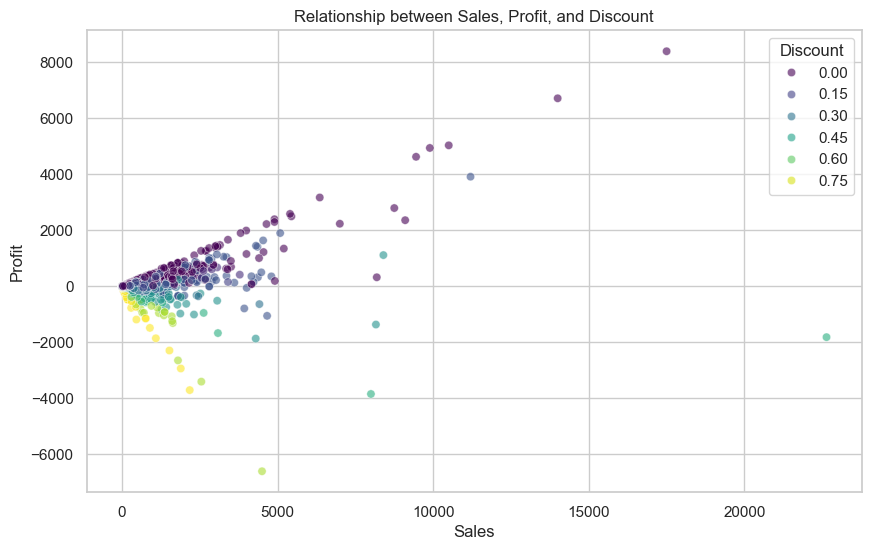

In [24]:
#Execute a Scatter Plot to examine the relationship between Sales, Profit, and the level of Discount
plt.figure(figsize=(10, 6))

# Scatter Plot of Sales vs Profit, colored by Discount
sns.scatterplot(x='Sales', y='Profit', hue='Discount', data=data, palette='viridis', alpha=0.6)
plt.title('Relationship between Sales, Profit, and Discount')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend(title='Discount')
plt.show()

##### Scatter Plot Analysis: Discount and Losses

1. Sales vs. Profit Correlation:

- Most data points cluster in the lower range of both sales and profit.
- Higher sales generally correlate with higher profits, but not always—some high-sales points still show low or negative profit.

2. Impact of Discount Levels:

- Low Discounts (0.00–0.15): These points (dark purple to purple) tend to be associated with higher profits.
- Moderate Discounts (0.30–0.45): These (blue to teal) show mixed results—some profitability, but also signs of erosion.
- High Discounts (0.60–0.75): These (green to yellow) are strongly associated with negative profits, even when sales are high.

##### 🎯 Strategic Insights

**Discount strategy** is a key driver of profitability:

- **High Discounts Hurt Profitability**: Steep discounts often lead to losses, even when sales volume increases.
- **Optimal Discounting Is Crucial**: Moderate or low discounts help maintain profit margins while still boosting sales.

#### `Profit` by `Category` Analysis

Question: Which product categories are receiving these high discounts and are primarily responsible for the losses?

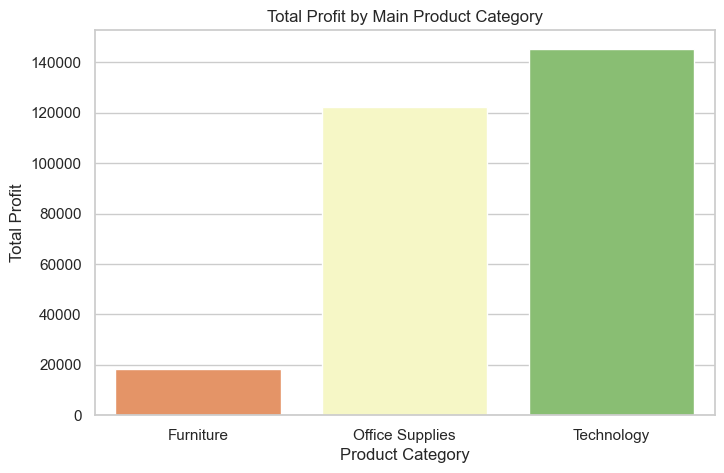

In [25]:
# Group the data by Category and calculate the total Profit and Sales for each
category_analysis = data.groupby('Category')[['Profit', 'Sales']].sum().reset_index()

# Plot the total Profit by Category
plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Profit', data=category_analysis, palette='RdYlGn') # Red/Yellow/Green palette
plt.title('Total Profit by Main Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Profit')
plt.show()

##### Analysis of Total Profit by Category

1. **Technology**: This is the most profitable category, generating over $140,000 in total profit.

2. **Office Supplies**: This is the second most profitable category, generating around $120,000 in total profit.

3. **Furniture**: This is the worst performing category by a huge margin, generating only around $18,000 in total profit, despite presumably having high sales (as furniture items are often expensive).

##### 🎯 Business Insight
**The Furniture category is clearly dragging down the overall profitability**. Since we already know that high discounts are the root cause of losses (from the Scatter Plot and Correlation Matrix), the next logical step is to investigate why Furniture is so unprofitable.

**We need to see if Furniture is receiving the highest average discounts, or if a specific sub-category within Furniture is failing.**

#### `Profit` by `Subcategory` Analysis

Let's dive deeper into the next level of granularity by analyzing profit across all 17 Sub-Category items. This will pinpoint the exact products causing the losses.

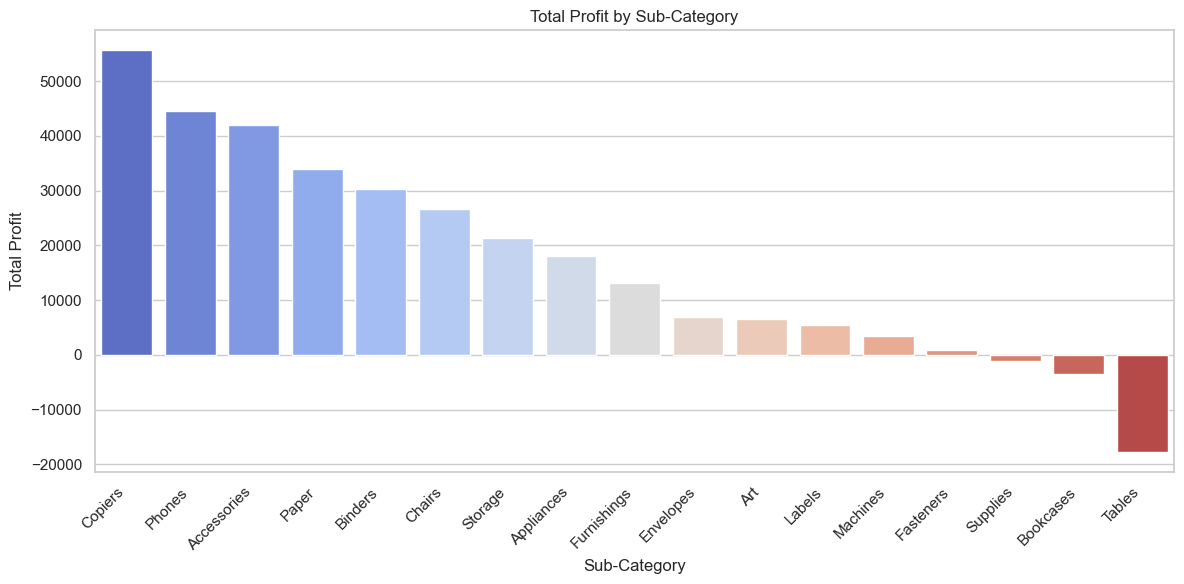

In [26]:
# Group by Sub-Category and calculate total profit and sales
sub_category_analysis = data.groupby('Sub-Category')[['Profit', 'Sales']].sum().reset_index()

# Sort the data by Profit (to see best and worst performers)
sub_category_analysis = sub_category_analysis.sort_values(by='Profit', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-Category', y='Profit', data=sub_category_analysis, 
            palette='coolwarm') # coolwarm highlights positive (blue) and negative (red) values

plt.title('Total Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45, ha='right') # Rotate labels for readability
plt.tight_layout()
plt.show()

In [27]:
# 1. Group by Sub-Category and calculate total profit
sub_category_analysis = data.groupby('Sub-Category')['Profit'].sum().reset_index()

# 2. Filter the DF to show only loss-making sub-categories (Profit < 0)
loss_makers = sub_category_analysis[sub_category_analysis['Profit'] < 0]

# 3. Sort by Profit (to see the magnitude of loss)
loss_makers = loss_makers.sort_values(by='Profit')

In [28]:
# 4. Display the resulting DF
loss_makers

,Sub-Category,Profit
16,Tables,-17725.4811
4,Bookcases,-3472.5560
15,Supplies,-1189.0995


##### Analysis of Total Profit by Sub-Category

1. **The Top Performers (Blue Bars)**. The highest profit generators are consistently high-margin items:
- Copiers are the absolute profit champions, generating over $55,000 in total profit.
- Phones and Accessories follow with strong, solid profits.

2. **The Critical Loss-Makers (Red Bars)**. Only 3 sub-categories show a negative total profit (the red bars):
- Tables: This is the worst-performing product line, resulting in a total net loss approaching $-18,000.
- Bookcases: Also in the net loss territory (around $-3,500).
- Supplies: Minor loss (around $-1,200)

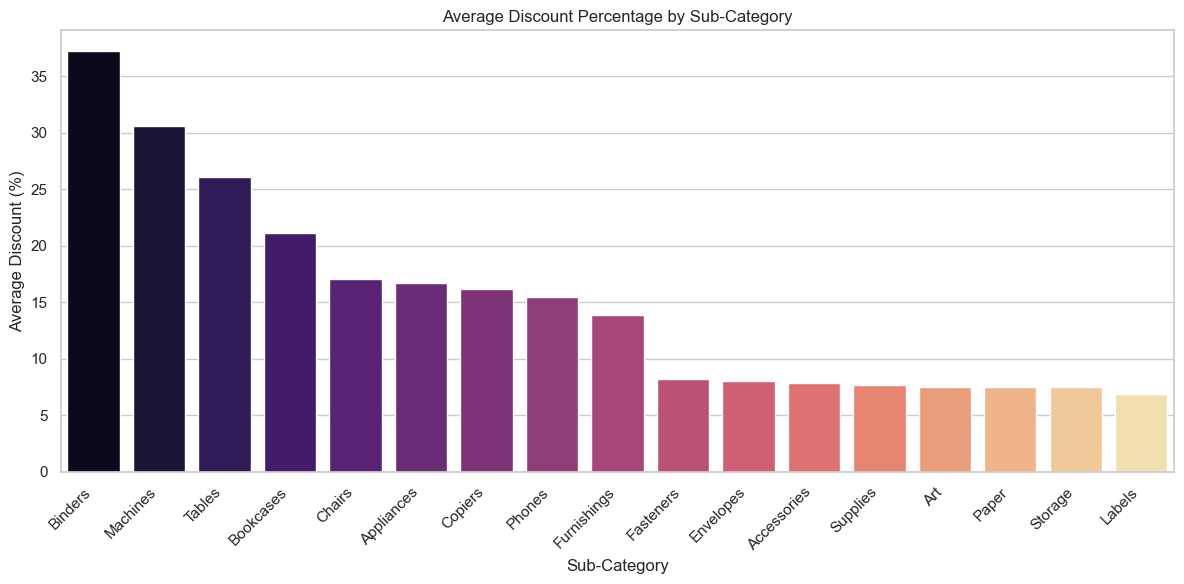

In [29]:
# Calculate the mean discount for each sub-category
avg_discount_analysis = data.groupby('Sub-Category')['Discount'].mean().reset_index()

# Multiply by 100 to visualize the percentage
avg_discount_analysis['Discount (%)'] = avg_discount_analysis['Discount'] * 100

# Sort by Discount in descending order
avg_discount_analysis = avg_discount_analysis.sort_values(by='Discount (%)', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Sub-Category', y='Discount (%)', data=avg_discount_analysis, palette='magma')
plt.title('Average Discount Percentage by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Average Discount (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Quantitative Break-Even Calculation

In [31]:
# Calculate Break-Even Discount
def calculate_break_even_discount(df, sub_categories_to_analyze):
    """
    Calculates the maximum discount limit (Break-Even Discount) for specified 
    sub-categories, ensuring Net Profit >= 0.

    Args:
        df (pd.DataFrame): The Superstore DataFrame.
        sub_categories_to_analyze (list): List of sub-categories (e.g., ['Tables', 'Bookcases', 'Supplies']).

    Returns:
        dict: Dictionary mapping sub-category to its calculated Break-Even Discount limit (as a formatted percentage string).
    """
    
    results = {}
    
    for sub_cat in sub_categories_to_analyze:
        # 1. Filter and Aggregate Data
        df_filtered = df[df['Sub-Category'] == sub_cat]
        
        total_sales = df_filtered['Sales'].sum()
        total_profit = df_filtered['Profit'].sum()
        
        # Check for zero sales to prevent errors
        if total_sales == 0:
            results[sub_cat] = "N/A (Zero Sales)"
            continue

        # 2. Calculate Total Costs (Total Costs = Total Sales - Total Profit)
        total_cost = total_sales - total_profit
        
        # 3. Calculate the Break-Even Discount (Discount_BE)
        break_even_discount_decimal = 1 - (total_cost / total_sales)
        
        # Convert to percentage
        break_even_discount_percent = break_even_discount_decimal * 100
        
        # Format result
        results[sub_cat] = f"{break_even_discount_percent:.2f}%"

    return results

# =========================================================================
# EXECUTION (CORRECTED)
# =========================================================================

# 1. Define the sub-categories that are currently showing a loss
loss_categories = ['Tables', 'Bookcases', 'Supplies'] 

# 2. Run the calculation - ***CHANGED df TO data***
discount_limits = calculate_break_even_discount(data, loss_categories)

# 3. Print the results
print("\n--- Calculated Break-Even Discount Limits ---")
print("This is the MAXIMUM allowable discount to maintain a Profit >= 0.")
print("If the result is NEGATIVE, the product is losing money even at a 0% discount (Cost structure issue).\n")
for sub_cat, limit in discount_limits.items():
    print(f"| {sub_cat:<12} | Limit: {limit:<10} |")


--- Calculated Break-Even Discount Limits ---
This is the MAXIMUM allowable discount to maintain a Profit >= 0.
If the result is NEGATIVE, the product is losing money even at a 0% discount (Cost structure issue).

| Tables       | Limit: -8.56%     |
| Bookcases    | Limit: -3.02%     |
| Supplies     | Limit: -2.55%     |


### **4. Conclusions & Strategic Recommendations**
This analysis identifies the root causes of Sample Superstore’s profitability challenges. Through targeted EDA, we uncovered how **discounting practices** and **product-level performance** are undermining margins, especially within the **Furniture category**.

### Key Metrics  
- Total Net Loss from Tables: **−$17,725** (Largest loss driver)
- Total Net Loss from Bookcases: **−$3,473**  
- Total Net Loss from Supplies: **-$1,189**
- Correlation (Profit vs Discount): **−0.22** (Strongest negative correlation)
- Break-Even Discount ($\text{Sconto}_{\text{BE}}$): NEGATIVE for all three loss-making sub-categories (Tables: $-\mathbf{8.56\%}$; Bookcases: $-\mathbf{3.02\%}$; Supplies: $-\mathbf{2.55\%}$).

### Strategic Insights

The data reveals a structural **misalignment between product cost and sales price**, which is compounded by a flawed discount strategy. The core problem is **not merely excessive discounting**, but that **the base sales price fails to cover costs for high-volume loss drivers**. This is evidenced by the negative Break-Even Discount.

The strategy fails on two major fronts:

**1. High Cost + Discount Mismanagement**: The base price is already insufficient. Applying aggressive discounts (like the $26\%$ average for Tables) to large sales items results in catastrophic loss per unit, overwhelming profits elsewhere.

**2. Low-Repeat Purchases**: The tactic of using discounts—meant for high-frequency items (Office Supplies)—on low-repeat, high-cost Furniture items destroys margins without generating long-term customer value.

### Recommendations  
The solution requires immediate operational adjustment followed by a strategic pricing overhaul.

**Immediate Action (Cost Structure Correction):**  
- Halt All Discounting: Immediately eliminate all discounting on Tables, Bookcases, and Supplies. This is mandatory because these products lose money even at a $\mathbf{0\%}$ discount ($\text{Sconto}_{\text{BE}}$ is negative).
- Investigate Costs: Initiate a comprehensive cost structure review for these three sub-categories, focusing on logistics, operational efficiency, and supplier pricing, as the current price point does not cover the cost of sale.

**Strategic Action (Pricing Overhaul):**  
- Implement Margin-Based Thresholds: Develop new pricing models that enforce positive profit margins before any promotional action is considered.
- Segment Pricing: Differentiate discounting tactics by product type: low or zero discounting for low-frequency, high-cost items (Furniture), and moderate, strategic discounting for high-frequency items (Office Supplies) to maximize Customer Lifetime Value.
- Monitor Sub-Category Performance: Monitor profitability and $\text{Sconto}_{\text{BE}}$ monthly to detect early signs of cost creep or pricing erosion.

In [ ]:
#Rename DF
sample_superstore_cleaned = data

In [ ]:
# Save the 'sample_superstore_cleaned' DataFrame to a CSV file
# We use sep=';' to divide the columns (field separator)
# We use decimal=',' for numbers (decimal separator)
sample_superstore_cleaned.to_csv('sample_superstore_cleaned.csv', index=False, sep=';', decimal=',')
print("DataFrame updated with 'Row ID' and saved to 'sample_superstore_cleaned.csv'.")

DataFrame updated with 'Row ID' and saved to 'sample_superstore_cleaned.csv'.


In [ ]:
# Step 1: Add the 'Row ID' column (unique identifier) to the DF
# The range(1, len(sample_superstore_cleaned) + 1) function creates a sequence of numbers from 1 to the total number of rows.
sample_superstore_cleaned['Row ID'] = range(1, len(sample_superstore_cleaned) + 1)

# Step 2: Save the updated DF to CSV
# We use sep=';' and decimal=',' for Tableau compatibility (European standard).
# We use the filename 'sample_superstore_cleaned.csv' as requested.
sample_superstore_cleaned.to_csv('sample_superstore_cleaned.csv', index=False, sep=';', decimal=',')

print("DataFrame updated with 'Row ID' and saved to 'sample_superstore_cleaned.csv'.")

DataFrame updated with 'Row ID' and saved to 'sample_superstore_cleaned.csv'.
